In [1]:
from citipy import citipy 
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
#x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
#y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
#coordinates = zip(x, y)

In [4]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

606

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7ea6b6fc43a70611a51955bf5b262681


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
city_data = []

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1


    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                        "Lat": city_lat,
                        "Lng": city_lng,
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | dikson
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | caloundra
Processing Record 5 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 1 | flinders
Processing Record 8 of Set 1 | takoradi
Processing Record 9 of Set 1 | esperance
Processing Record 10 of Set 1 | vanderhoof
Processing Record 11 of Set 1 | pacific grove
Processing Record 12 of Set 1 | kuytun
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | chokurdakh
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | vila velha
Processing Record 19 of Set 1 | narsaq
Processing Record 20 of Set 1 | riyadh
Processing Record 21 of Set 1 | port hardy
Processing Record 22 of Set 1 | yumbi

Processing Record 41 of Set 4 | cangucu
Processing Record 42 of Set 4 | ketchikan
Processing Record 43 of Set 4 | korla
Processing Record 44 of Set 4 | rafai
Processing Record 45 of Set 4 | lagoa
Processing Record 46 of Set 4 | samarai
Processing Record 47 of Set 4 | pisco
Processing Record 48 of Set 4 | ostrovnoy
Processing Record 49 of Set 4 | sangar
Processing Record 50 of Set 4 | librazhd
Processing Record 1 of Set 5 | chuy
Processing Record 2 of Set 5 | barrow
Processing Record 3 of Set 5 | makakilo city
Processing Record 4 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 5 of Set 5 | saldanha
Processing Record 6 of Set 5 | bintulu
Processing Record 7 of Set 5 | ternate
Processing Record 8 of Set 5 | ous
Processing Record 9 of Set 5 | huangmei
Processing Record 10 of Set 5 | chapleau
Processing Record 11 of Set 5 | marzuq
Processing Record 12 of Set 5 | burnie
Processing Record 13 of Set 5 | elk city
Processing Record 14 of Set 5 | port hawkesbury
Pr

Processing Record 28 of Set 8 | skibbereen
Processing Record 29 of Set 8 | bo
City not found. Skipping...
Processing Record 30 of Set 8 | vostok
Processing Record 31 of Set 8 | moron
Processing Record 32 of Set 8 | bulgan
Processing Record 33 of Set 8 | evensk
Processing Record 34 of Set 8 | estelle
Processing Record 35 of Set 8 | nabire
Processing Record 36 of Set 8 | kahului
Processing Record 37 of Set 8 | tibu
Processing Record 38 of Set 8 | vung tau
Processing Record 39 of Set 8 | saint-leu
Processing Record 40 of Set 8 | turayf
Processing Record 41 of Set 8 | agirish
Processing Record 42 of Set 8 | nanakuli
Processing Record 43 of Set 8 | sterling
Processing Record 44 of Set 8 | kangaatsiaq
Processing Record 45 of Set 8 | buin
Processing Record 46 of Set 8 | sabinas hidalgo
Processing Record 47 of Set 8 | kavaratti
Processing Record 48 of Set 8 | waipawa
Processing Record 49 of Set 8 | hualmay
Processing Record 50 of Set 8 | kloulklubed
Processing Record 1 of Set 9 | zverinogolovs

Processing Record 18 of Set 12 | strani
Processing Record 19 of Set 12 | bathsheba
Processing Record 20 of Set 12 | leshukonskoye
Processing Record 21 of Set 12 | stony plain
Processing Record 22 of Set 12 | egvekinot
Processing Record 23 of Set 12 | yuksekova
Processing Record 24 of Set 12 | fort-shevchenko
Processing Record 25 of Set 12 | mont-de-marsan
Processing Record 26 of Set 12 | westport
Processing Record 27 of Set 12 | huarmey
Processing Record 28 of Set 12 | etchojoa
Processing Record 29 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 30 of Set 12 | mbandaka
Processing Record 31 of Set 12 | impfondo
Processing Record 32 of Set 12 | jardim de piranhas
Processing Record 33 of Set 12 | umtata
Processing Record 34 of Set 12 | melenci
Processing Record 35 of Set 12 | barra do garcas
Processing Record 36 of Set 12 | dicabisagan
Processing Record 37 of Set 12 | karamay
City not found. Skipping...
Processing Record 38 of Set 12 | srednekolymsk
Processing Record 

In [8]:
len(city_data)

556

In [9]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dikson,73.5069,80.5464,23.23,86,100,11.34,RU,2022-03-31 01:54:27
1,Punta Arenas,-53.1500,-70.9167,50.11,57,75,14.97,CL,2022-03-31 01:51:12
2,Ushuaia,-54.8000,-68.3000,46.06,81,75,9.22,AR,2022-03-31 01:54:28
3,Caloundra,-26.8000,153.1333,84.13,66,43,5.01,AU,2022-03-31 01:54:28
4,Flinders,-34.5833,150.8552,67.37,86,96,5.99,AU,2022-03-31 01:54:29
5,Takoradi,4.8845,-1.7554,80.38,88,70,7.58,GH,2022-03-31 01:54:29
6,Esperance,-33.8667,121.9000,67.84,66,100,15.19,AU,2022-03-31 01:54:30
7,Vanderhoof,54.0166,-124.0198,41.49,53,83,9.35,CA,2022-03-31 01:50:10
8,Pacific Grove,36.6177,-121.9166,59.38,79,100,8.99,US,2022-03-31 01:54:30
9,Kuytun,54.3419,101.5036,30.25,82,100,4.12,RU,2022-03-31 01:54:30


In [10]:
# Rearrange columns in the Dataframe
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
# Print new Dataframe
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dikson,RU,2022-03-31 01:54:27,73.5069,80.5464,23.23,86,100,11.34
1,Punta Arenas,CL,2022-03-31 01:51:12,-53.1500,-70.9167,50.11,57,75,14.97
2,Ushuaia,AR,2022-03-31 01:54:28,-54.8000,-68.3000,46.06,81,75,9.22
3,Caloundra,AU,2022-03-31 01:54:28,-26.8000,153.1333,84.13,66,43,5.01
4,Flinders,AU,2022-03-31 01:54:29,-34.5833,150.8552,67.37,86,96,5.99
5,Takoradi,GH,2022-03-31 01:54:29,4.8845,-1.7554,80.38,88,70,7.58
6,Esperance,AU,2022-03-31 01:54:30,-33.8667,121.9000,67.84,66,100,15.19
7,Vanderhoof,CA,2022-03-31 01:50:10,54.0166,-124.0198,41.49,53,83,9.35
8,Pacific Grove,US,2022-03-31 01:54:30,36.6177,-121.9166,59.38,79,100,8.99
9,Kuytun,RU,2022-03-31 01:54:30,54.3419,101.5036,30.25,82,100,4.12


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Add the latitudes and longitudes to a list.
#coordinates = list(lat_lngs)

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

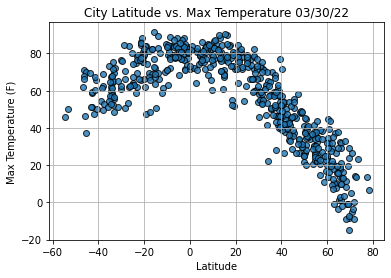

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

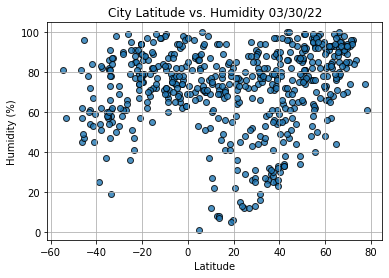

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

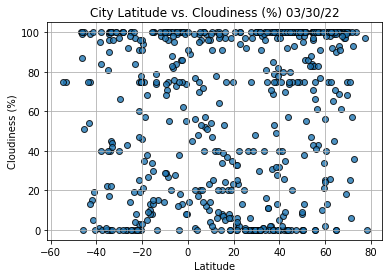

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

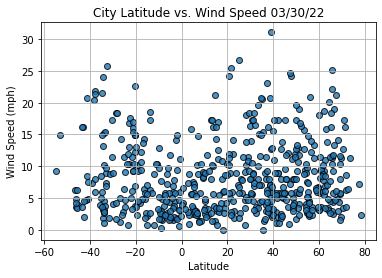

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                  Yellowknife
Country                        CA
Date          2022-03-31 01:54:32
Lat                        62.456
Lng                     -114.3525
Max Temp                    20.41
Humidity                       57
Cloudiness                    100
Wind Speed                   9.22
Name: 13, dtype: object

In [20]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3      False
4      False
       ...  
551    False
552     True
553     True
554     True
555     True
Name: Lat, Length: 556, dtype: bool

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dikson,RU,2022-03-31 01:54:27,73.5069,80.5464,23.23,86,100,11.34
5,Takoradi,GH,2022-03-31 01:54:29,4.8845,-1.7554,80.38,88,70,7.58
7,Vanderhoof,CA,2022-03-31 01:50:10,54.0166,-124.0198,41.49,53,83,9.35
8,Pacific Grove,US,2022-03-31 01:54:30,36.6177,-121.9166,59.38,79,100,8.99
9,Kuytun,RU,2022-03-31 01:54:30,54.3419,101.5036,30.25,82,100,4.12


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

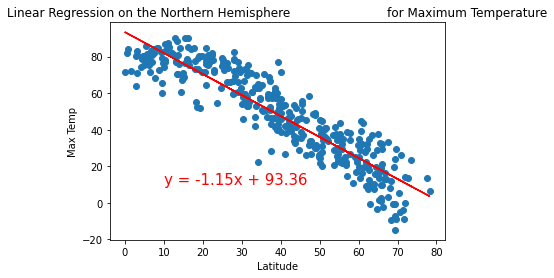

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,10))

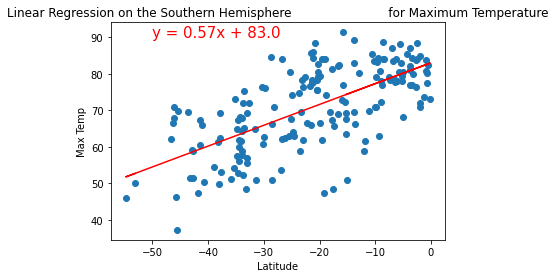

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

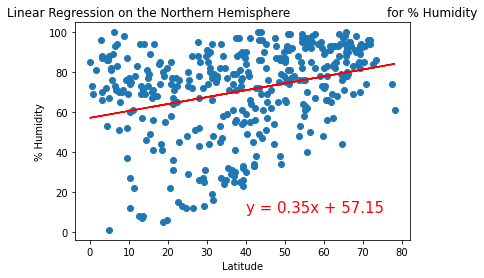

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

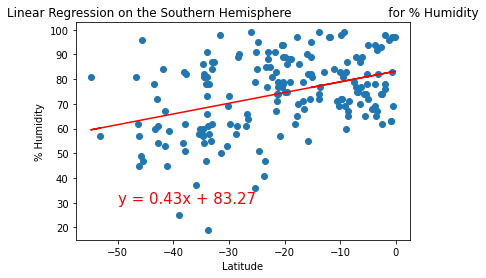

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,30))

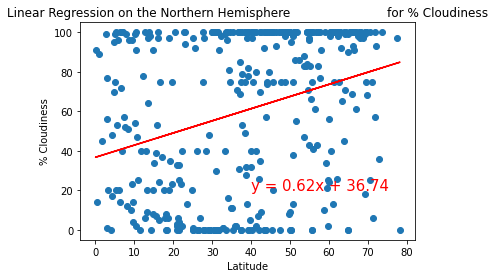

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,20))

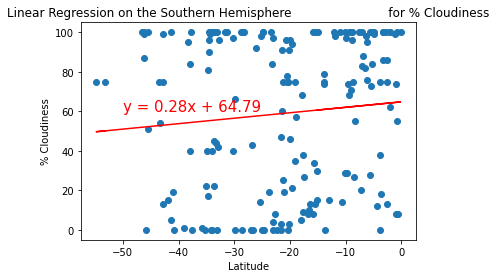

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

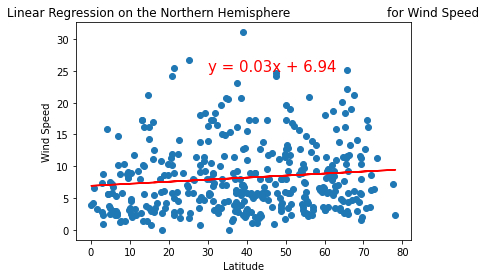

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(30,25))

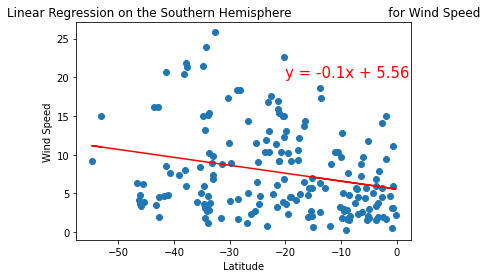

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-20,20))
